<h2 style="text-align: center;"><b>Нейронная сеть из одного нейрона</b></h3>

---

<h3 style="text-align: center;"><b>Компоненты нейросети</b></h3>

Принципиальную роль в построении любой ***нейронной сети*** играют следующие вещи:

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество итераций обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

Всё вышеперечисленное мы задаём *руками*, самостоятельно.

То, что связано с ***данными и задачей*** также имеет существенное влияние:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

<h3 style="text-align: center;"><b>Один нейрон на Keras</b></h3>

В качестве примера возьмём простой набор данных для классификации -- датасет "яблоки и груши":

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Academic/ML/Labs/Lab08/apples_pears.csv")

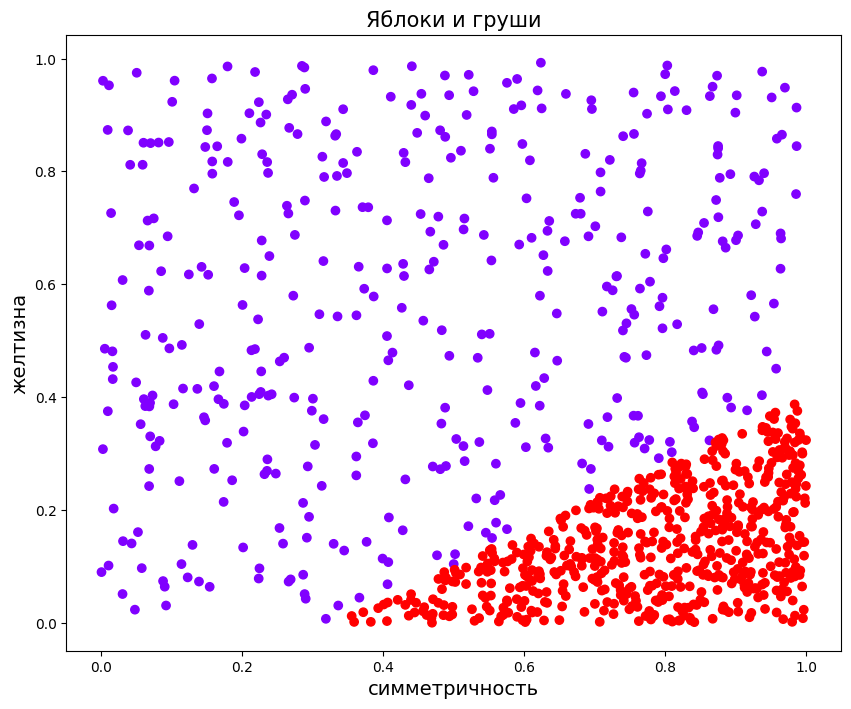

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

In [ ]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
y = data['target'].values.reshape((-1, 1))  # классы (столбец из нулей и единиц)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid

In [ ]:
X[:,:10]

array([[0.77942731, 0.25730527],
       [0.77700501, 0.0159154 ],
       [0.97709225, 0.30420962],
       ...,
       [0.92721921, 0.13498618],
       [0.01582991, 0.48132194],
       [0.96796389, 0.30857107]])

In [ ]:
num_features = X.shape[1]

neuron = Sequential()
neuron.add(Dense(1, input_shape=(num_features,), activation=sigmoid))

In [ ]:
neuron

Пока что мы просто создали объект класса `Sequential`, который состоит из одного линейного входного слоя размерности (num_features, 1) и 1 нейрона с сигмоидой в качестве активационной функции. Но уже сейчас его можно применить к объекту (тензору), просто веса в начале инициализирутся случайно и при forward_pass'е мы получим какой-то ответ пока что необученного нейрона:

In [ ]:
neuron.predict([[1,1]])

1/1 [==============================] - 0s 69ms/step


array([[0.6403711]], dtype=float32)

Выполним предсказания по всем данным с помощью ещё не обученного нейрона:

32/32 [==============================] - 0s 2ms/step
[[ True]
 [ True]
 [ True]
 [ True]
 [ True]]


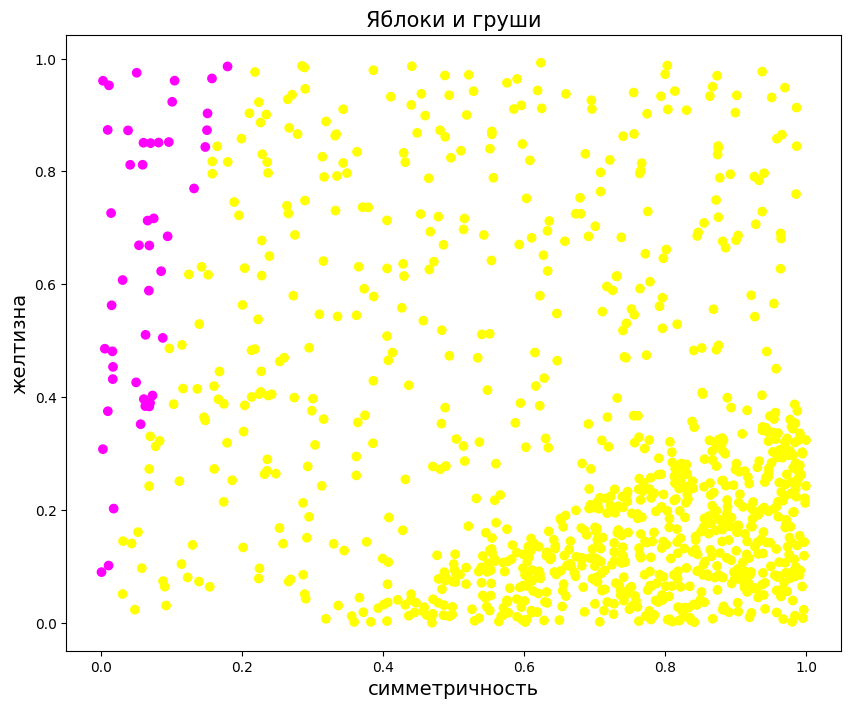

In [ ]:
proba_pred = neuron.predict(X)
y_pred = proba_pred > 0.5
print(y_pred[:5])
y_pred = y_pred.reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

Как и ожидалось, ошибка существенная, по сути, модель не умеет различать классы. Давайте научим нейрон отличать груши от яблок по их симметричности и желтизне!

## Код обучения одного нейрона на Keras:

Обучим нейрон с использованием метода SGD (стохастический градиентный спуск).
Нам понадобится пакет Keras.optimizers, который содержит различные алгоритмы оптимизации.

Зададим параметры:
- затухание весов 1e-6
- момент 0.9
- включим поддержку ускоренного градиента Нестерова (http://proceedings.mlr.press/v28/sutskever13.pdf)
- шаг обучения установим равным 0.1

Не забываем накапливать историю обучения - понадобится для построения графиков

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
sgd = optimizers.legacy.SGD(decay=1e-6, momentum=0.9, nesterov=True, learning_rate=0.01)
neuron.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
history=neuron.fit(X, y, epochs=100, batch_size=25, verbose=1, validation_split=0.2)

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.2082 - accuracy: 0.6637 - val_loss: 0.2017 - val_accuracy: 0.6600
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1995 - accuracy: 0.7138 - val_loss: 0.1919 - val_accuracy: 0.7250
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1906 - accuracy: 0.7500 - val_loss: 0.1832 - val_accuracy: 0.7700
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1825 - accuracy: 0.7887 - val_loss: 0.1750 - val_accuracy: 0.8100
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1750 - accuracy: 0.8050 - val_loss: 0.1675 - val_accuracy: 0.8250
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1682 - accuracy: 0.8225 - val_loss: 0.1609 - val_accuracy: 0.8350
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1620 - accuracy: 0.8363 - val_loss: 0.1546 - val_accuracy: 0.8550
Epoch 8/100
3

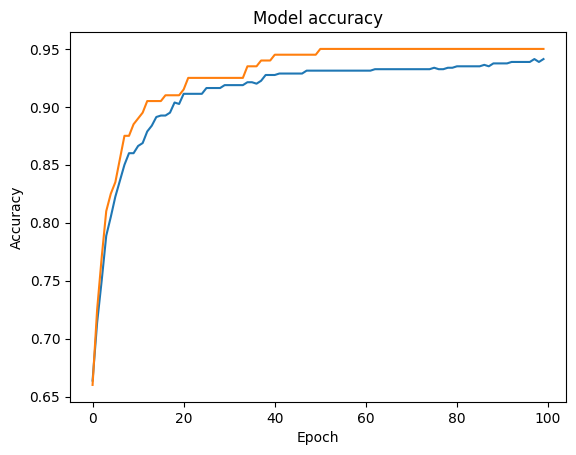

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['train','test'])
plt.show()




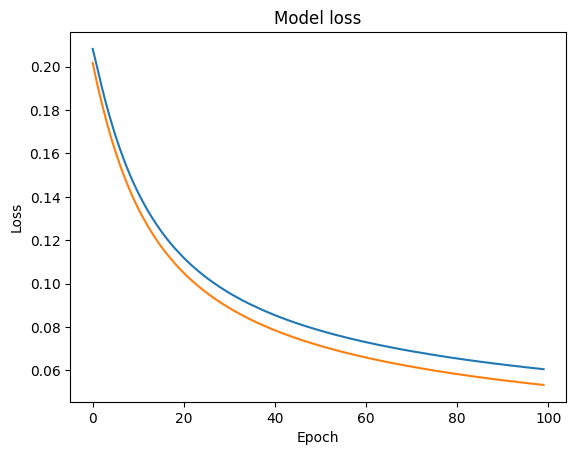

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Обучили. Снова выполним предсказания, но уже с помощью обученной модели.

32/32 [==============================] - 0s 3ms/step


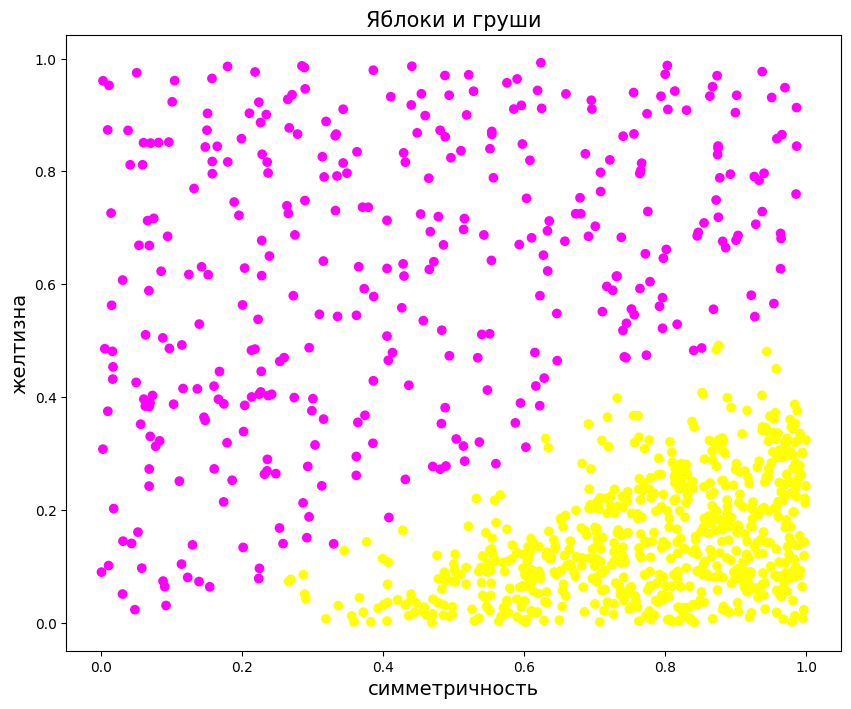

In [ ]:
proba_pred = neuron.predict(X)
y_pred = proba_pred > 0.5
y_pred = y_pred.reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

<h2 style="text-align: center;"><b>Многослойная сеть на Keras</b></h3>

---

## Многослойная нейронная сеть

Как можно понять из названия, многослойная нейросеть состоит из нескольких **слоёв**. Ещё такую многослойную нейросеть, у которой каждый нейрон на предыдущем уровне соединён с нейроном на следующем уровне, называют ***Fully-Connected-сетью*** (или ***Dense-сетью***).  

Расмотрим их устройство более подробно:

* Вот так выглядит двухслойная нейросеть (первый слой - input layer - не считается, потому что это, по сути, не слой):

<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" width=300, height=200>

* Так выглядит трёхслойная нейросеть:

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" width=400, height=300>

.. и так далее для большего случая слоёв.

**Обратите внимание:** связи есть от каждого нейрона слоя $L_{i-1}$ к каждому нейрону слоя $L_{i}$, но между нейронами в одном слое связей **нет**.

**Входной слой** -- это данные (матрица $(n, m)$).

Слои, которые не являются входными или выходными, называются **скрытыми слоями (hidden layers)**.

При решении ***задачи регрессии*** в **выходном слое** есть только один нейрон, который возвращает предсказанные числа (для каждого объекта по числу).  

В случае решения ***задачи классификации*** в **выходном слое** может быть как один, так и несколько нейронов. Если решается задача бинарной классификации, то слой содержит один нейрон и $K$ нейронов, если решается задача $K$-класовой классификации.

#### Прямое распространение

Каждый слой многослойной нейросети - это матрица весов, столбцы которой -- это нейроны (один столбец - один нейрон). То есть один столбец -- это веса одного нейрона.

Допустим, мы решаем задачу $K$-классовой классификации (на последнем слое $K$ нейронов). Рассмотрим, как в таком случае выглядит `forward_pass` нейросети:

* Вход: $$X =
\left(
\begin{matrix}
x_{11} & ... & x_{1M} \\
... & \ddots  & ...\\
x_{N1} & ... & x_{NM}
\end{matrix}
\right)
$$

-- матрица $(N, M)$

* Структура сети - много слоёв, в слоях много нейронов. Первый слой (после входного) выглядит так:

$$ W^1 =
\left(
\begin{matrix}
w_{11} & ... & w_{1L_1} \\
... & \ddots  & ...\\
w_{M1} & ... & w_{ML_1}
\end{matrix}
\right)
$$

-- матрица $(M, L_1)$

То есть это в точности $L_1$ нейронов, каждый имеет свои собственные веса, их $M$ штук.

Мы помним, что нейрон - это линейное преобразование и потом нелинейная функция активации от этого преобразования. Однако в многослойных нейростеях часто отделяют `Linear` часть и `Activation`, то есть слоем считаем набор весов нейронов, а следующий слой всегда функция активации (у всех нейронов из слоя она одна и та же, обычно фреймворки не позволяют задавать конкретному нейрону в слое отличную от других нейронов в этом слое функцию активации, однако это легко сделать, объявив слой из одного нейрона).

* Другие слои выглядит точно так же, как первый слой. Например, второй слой будет такой:

$$ W^2 =
\left(
\begin{matrix}
w_{11} & ... & w_{1L_2} \\
... & \ddots  & ...\\
w_{L_11} & ... & w_{L_1L_2}
\end{matrix}
\right)
$$

-- матрица $(L_1, L_2)$

То есть это в точности $L_2$ нейронов, каждый имеет свои собственные веса, их $L_1$ штук.

* Выходной слой:  

Пусть в нейросети до выходного слоя идут $t$ слоёв. Тогда выходной слой имеет форму:

$$ W^{out} =
\left(
\begin{matrix}
w_{11} & ... & w_{1K} \\
... & \ddots  & ...\\
w_{L_t1} & ... & w_{L_tK}
\end{matrix}
\right)
$$

-- матрица $(L_t, K)$, где $L_t$ - количество нейронов в $t$-ом слое, а $K$ -- количество классов.

В итоге *для `forward_pass` нам нужно просто последовтельно перемножить матрицы друг за другом, применяя после каждого умножения соответсвующую функцию активации*.

*Примечание*: можно думать об умножении на очередную матрицу весов как на переход в **новое признаковое пространство**. Действительно, когда подаём матрицу $X$ и умножаем на матрицу первого слоя, мы получаем матрицу размера $(N, L_1)$, то есть как будто $L_1$ "новых" признаков (построенных как линейная комбинация старых до применения функции активации, и уже как нелинейная комбинация после активации). Здесь уместно вспомнить, что Deep Learning является пообластью Representation Learning, то есть позволяет выучивает новые представляения данных.

**Обратное распространение**

Обучается с помощью метода "Error Backpropagation" - ["Обратное распространение ошибки"](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B8), принцип распространения очень похож на то, как мы обучали один нейрон - это градиентный спуск, но по "всей нейросети" сразу.  

Backpropagation работает корректно благодаря ***chain rule*** (=правилу взятия производной сложной функции):  

Если $f(x) = f(g(x))$, то:  

$$\frac{\partial{f}}{\partial{x}} = \frac{\partial{f}}{\partial{g}} \frac{\partial{g}}{\partial{x}}$$

Более подробно про backpropagation можно прочитать здесь (на английском):  https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

# Создание двухслойной нейросети
Cоздадим двухслойную нейросеть из 100 нейронов:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import keras

Генерация датасета:

In [ ]:
N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

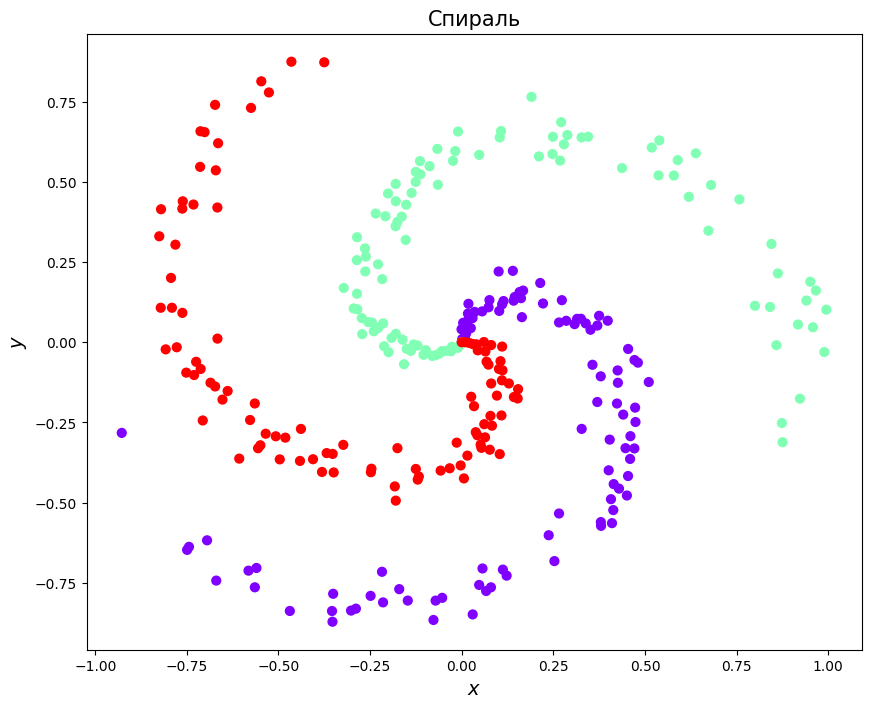

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)
plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

In [ ]:
print(X.data.shape, y.data.shape)

(300, 2) (300,)


In [ ]:
from keras.utils import to_categorical

y = to_categorical(y, 3)

In [ ]:
from keras import optimizers
two_layer_net=keras.models.Sequential()
two_layer_net.add(keras.layers.Dense(100, input_shape=(X.shape[1],), activation='relu'))
two_layer_net.add(keras.layers.Dense(3, activation='softmax'))
print(two_layer_net.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               300       
                                                                 
 dense_6 (Dense)             (None, 3)                 303       
                                                                 
Total params: 603 (2.36 KB)
Trainable params: 603 (2.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


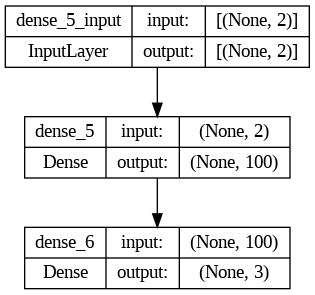

In [ ]:
#визуализация модели
from keras.utils import plot_model
plot_model(two_layer_net, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras import optimizers
sgd = optimizers.legacy.SGD(decay=1e-6, momentum=0.9, nesterov=True, learning_rate=0.01)
two_layer_net.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history=two_layer_net.fit(X, y, epochs=150, batch_size=64, verbose=1, validation_split=0.2)


Epoch 1/150
4/4 [==============================] - 1s 79ms/step - loss: 1.1030 - accuracy: 0.1875 - val_loss: 1.0822 - val_accuracy: 0.0833
Epoch 2/150
4/4 [==============================] - 0s 20ms/step - loss: 1.0833 - accuracy: 0.3750 - val_loss: 1.1410 - val_accuracy: 0.0000e+00
Epoch 3/150
4/4 [==============================] - 0s 20ms/step - loss: 1.0571 - accuracy: 0.5292 - val_loss: 1.2143 - val_accuracy: 0.0000e+00
Epoch 4/150
4/4 [==============================] - 0s 20ms/step - loss: 1.0292 - accuracy: 0.5500 - val_loss: 1.2938 - val_accuracy: 0.0000e+00
Epoch 5/150
4/4 [==============================] - 0s 14ms/step - loss: 1.0023 - accuracy: 0.5833 - val_loss: 1.3708 - val_accuracy: 0.0000e+00
Epoch 6/150
4/4 [==============================] - 0s 20ms/step - loss: 0.9808 - accuracy: 0.5917 - val_loss: 1.4454 - val_accuracy: 0.0000e+00
Epoch 7/150
4/4 [==============================] - 0s 19ms/step - loss: 0.9599 - accuracy: 0.6000 - val_loss: 1.5106 - val_accuracy: 0.0000e

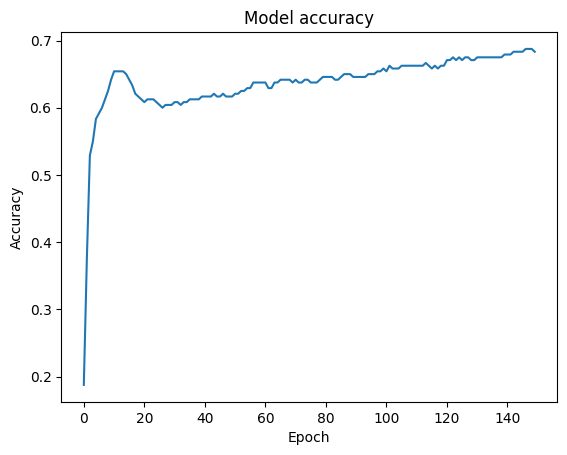

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend(['train','test'])
plt.show()

# Создание многослойной нейросети
Усложним архитектуру нейронной сети прямого распространения:

In [ ]:
many_layer_net=keras.models.Sequential()
two_layer_net.add(keras.layers.Dense(100, input_shape=(X.shape[1],), activation='relu'))
two_layer_net.add(keras.layers.Dense(100, activation='relu'))

two_layer_net.add(keras.layers.Dense(100, activation='relu'))
two_layer_net.add(keras.layers.Dense(3, activation='softmax'))
sgd = optimizers.legacy.SGD(decay=1e-6, momentum=0.9, nesterov=True, learning_rate=0.001)
two_layer_net.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history=two_layer_net.fit(X, y, epochs=150, batch_size=64, verbose=1, validation_split=0.2)


Epoch 1/150
4/4 [==============================] - 3s 287ms/step - loss: 1.0905 - accuracy: 0.4167 - val_loss: 1.1365 - val_accuracy: 0.0000e+00
Epoch 2/150
4/4 [==============================] - 0s 48ms/step - loss: 1.0890 - accuracy: 0.4167 - val_loss: 1.1453 - val_accuracy: 0.0000e+00
Epoch 3/150
4/4 [==============================] - 0s 51ms/step - loss: 1.0868 - accuracy: 0.4167 - val_loss: 1.1568 - val_accuracy: 0.0000e+00
Epoch 4/150
4/4 [==============================] - 0s 25ms/step - loss: 1.0842 - accuracy: 0.4167 - val_loss: 1.1697 - val_accuracy: 0.0000e+00
Epoch 5/150
4/4 [==============================] - 0s 25ms/step - loss: 1.0813 - accuracy: 0.2833 - val_loss: 1.1833 - val_accuracy: 0.0000e+00
Epoch 6/150
4/4 [==============================] - 0s 22ms/step - loss: 1.0788 - accuracy: 0.4167 - val_loss: 1.1977 - val_accuracy: 0.0000e+00
Epoch 7/150
4/4 [==============================] - 0s 22ms/step - loss: 1.0758 - accuracy: 0.4167 - val_loss: 1.2118 - val_accuracy: 0.

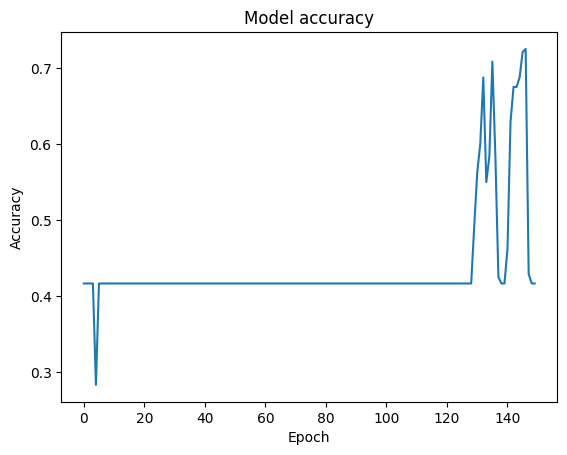

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Создание многослойной нейросети для классификации рукописных цифр

In [ ]:
import keras

from keras.datasets import mnist
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.models import Sequential
# from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

number_of_classes = 10

11490434/11490434 [==============================] - 1s 0us/step


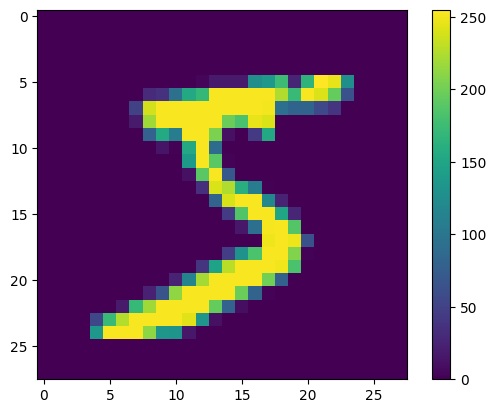

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)


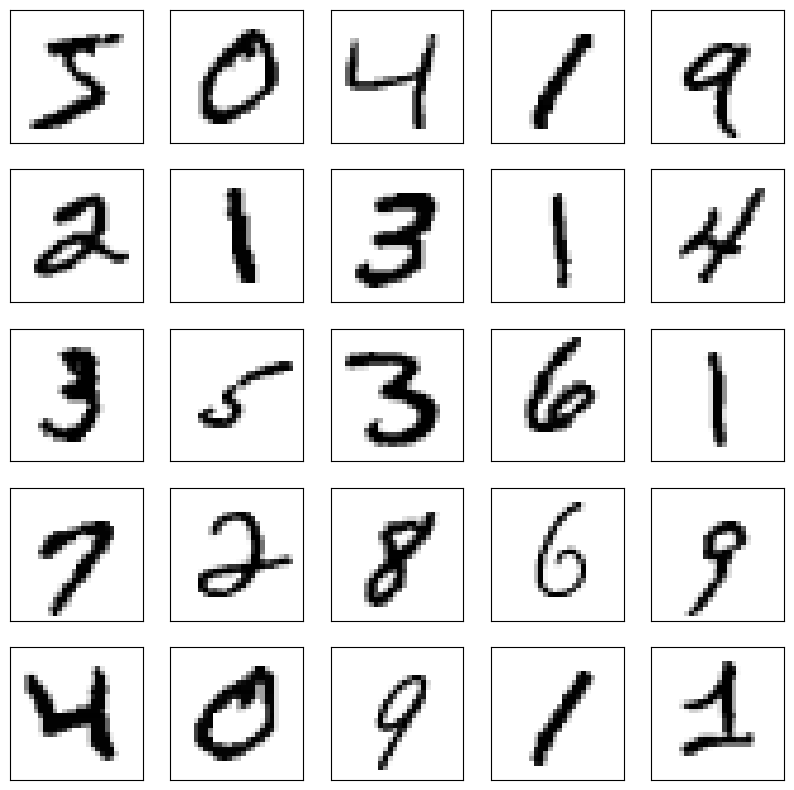

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]).astype('float32')

#для преобразования двумерных данных в одномерные в нейронной сети можно использовать слой Flatten(input_shape=(28,28))

X_train/=255
X_test/=255

y_train = to_categorical(y_train, number_of_classes)
y_test = to_categorical(y_test, number_of_classes)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(512, input_dim=(X_train.shape[1]), activation='relu'))
model.add(keras.layers.Dense(number_of_classes, activation='softmax'))
print(model.summary())


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               401920    
                                                                 
 dense_16 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200)


Epoch 1/5
300/300 [==============================] - 6s 19ms/step - loss: 0.3036 - accuracy: 0.9138 - val_loss: 0.1570 - val_accuracy: 0.9563
Epoch 2/5
300/300 [==============================] - 4s 14ms/step - loss: 0.1236 - accuracy: 0.9647 - val_loss: 0.1103 - val_accuracy: 0.9662
Epoch 3/5
300/300 [==============================] - 5s 15ms/step - loss: 0.0817 - accuracy: 0.9763 - val_loss: 0.0864 - val_accuracy: 0.9735
Epoch 4/5
300/300 [==============================] - 7s 22ms/step - loss: 0.0609 - accuracy: 0.9826 - val_loss: 0.0721 - val_accuracy: 0.9778
Epoch 5/5
300/300 [==============================] - 4s 14ms/step - loss: 0.0453 - accuracy: 0.9872 - val_loss: 0.0658 - val_accuracy: 0.9791


In [ ]:
#оценка точности
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.0658 - accuracy: 0.9791
Test accuracy: 0.9790999889373779
Test loss: 0.06583745032548904


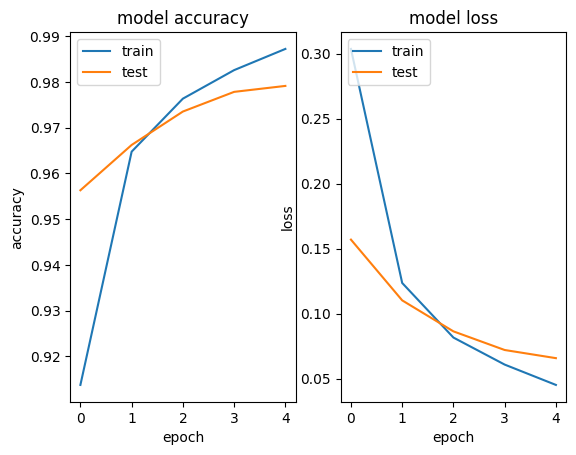

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set(title='model accuracy')
ax1.set(ylabel='accuracy')
ax1.set(xlabel='epoch')
ax1.legend(['train', 'test'], loc='upper left')
ax2 = fig.add_subplot(1,2,2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set(title='model loss')
ax2.set(ylabel='loss')
ax2.set(xlabel='epoch')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()


# Инициализация сети
Важным моментом при конструировании сети является начальная инициализация весов. Удачно выбранный способ инициализации весов может значительно влиять на способность модели к обучению.

Существует различные подходы к начальной инициализации весов.

Например, метод Завьера. Основная идея этого метода — упростить прохождение сигнала через слой во время как прямого, так и обратного распространения ошибки для линейной функции активации (этот метод также хорошо работает для сигмоидной функции, так как участок, где она ненасыщена, также имеет линейный характер). При вычислении весов этот метод опирается на вероятностное распределение.

Метод инициализации Ге (He) — это вариация метода Завьера, больше подходящая функции активации ReLU, компенсирующая тот факт, что эта функция возвращает нуль для половины области определения.

Выделяют также метод ортогональной инициализации.

In [ ]:
model_reg = keras.models.Sequential()
model_reg.add(keras.layers.Dense(512, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='he_uniform'))
model_reg.add(keras.layers.Dense(number_of_classes, activation='softmax', kernel_initializer='glorot_uniform'))

# L2-регуляризация
Одной из основных проблем машинного обучения является проблема переобучения (overfitting), когда модель в погоне за минимизацией затрат на обучение теряет способность к обобщению.

Существует простой способ держать переобучение под контролем — метод dropout.

Но есть и другие регуляризаторы, которые можно применить к сети. Один из них — L_2-регуляризация (также называемая сокращением весов, англ. weight decay), которая использует более прямой подход к регуляризации, чем dropout. Обычно первопричиной переобучения является сложность модели (в смысле количества ее параметров), слишком высокая для решаемой задачи и имеющегося обучающего множества. В некотором смысле, задача регуляризатора — понизить сложность модели, сохранив количество ее параметров.

L_2-регуляризация выполняется посредством наложения штрафов (penalising) на веса с наибольшими значениями, минимизируя их L_2-норму с использованием параметра λ — коэффициент регуляризации, выражающий предпочтение минимизации нормы относительно минимизации потерь на обучающем множестве.

Крайне важно правильно выбрать λ. Если коэффициент слишком мал, то эффект от регуляризации будет ничтожен, если же слишком велик — модель обнулит все веса.

In [ ]:
from keras.regularizers import l2
l2_lambda = 0.0001
model_reg = keras.models.Sequential()
model_reg.add(keras.layers.Dense(512, input_dim=(X_train.shape[1]), activation='relu',kernel_initializer='he_uniform', bias_regularizer=l2(l2_lambda)))
model_reg.add(keras.layers.Dense(number_of_classes, activation='softmax', kernel_initializer='glorot_uniform'))

In [ ]:
model_reg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model_reg.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=200)

Epoch 1/5
300/300 [==============================] - 6s 18ms/step - loss: 0.3051 - accuracy: 0.9139 - val_loss: 0.1555 - val_accuracy: 0.9541
Epoch 2/5
300/300 [==============================] - 4s 14ms/step - loss: 0.1236 - accuracy: 0.9648 - val_loss: 0.1075 - val_accuracy: 0.9675
Epoch 3/5
300/300 [==============================] - 5s 17ms/step - loss: 0.0813 - accuracy: 0.9769 - val_loss: 0.0865 - val_accuracy: 0.9736
Epoch 4/5
300/300 [==============================] - 7s 22ms/step - loss: 0.0575 - accuracy: 0.9837 - val_loss: 0.0734 - val_accuracy: 0.9772
Epoch 5/5
300/300 [==============================] - 7s 22ms/step - loss: 0.0445 - accuracy: 0.9871 - val_loss: 0.0684 - val_accuracy: 0.9789


## Применение обученной нейронной сети
Необходимо нарисовать цифру (например в Paint) или скачать из Интернета

1/1 [==============================] - 0s 22ms/step
[0.03536047 0.12575476 0.24591148 0.05914886 0.03735111 0.08705059
 0.08026818 0.17108116 0.11750222 0.04057114]


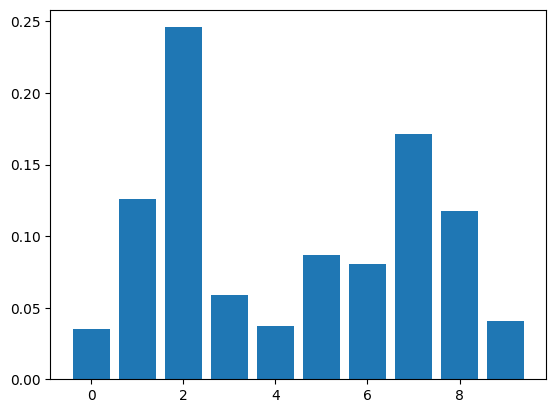

2


In [ ]:
#выполняем преобразование картинки с цифрой
from PIL import Image
#преобразование входного изображения в формат набора MNIS
image=Image.open("number_2.png").resize((28,28))
img = np.invert(image.convert('L')).ravel()
im2arr = img.reshape(1, 28* 28).astype('float32')/255
#plt.imshow(image, cmap=plt.cm.binary)
#использование обученной модели
y_pred = model.predict(im2arr)
print(y_pred[0])
plt.bar(range(10), y_pred[0])
plt.show()
print(np.argmax(y_pred))

In [ ]:
#сохранение модели
model.save('model.h5')

#загрузка модели
#model_load=keras.models.load_model('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Задание 1
1. Попробуйте улучшить результат классификации за счет изменения следующих параметров: скорость обучения, количество эпох, виды оптимизаторов, количество нейронов, количество слоев. Результаты анализа представьте в виде графиков (диаграмм).
2. Добавьте слой (слои) Dropout (model.add(keras.layers.Dropout(0.5))), посмотрите, как изменится результат.
3. Добавьте слой нормализации (keras.layers.BatchNormalization) и оцените его влияние на качество обучения. Сделайте выводы.

## Задание 2
1. Между двух слоев нейронной сети добавить слой Dropout
model.add(keras.layers.Dropout(0.5)), переобучить модель, оценить качество обучения.
Объяснить полученные результаты
2. Добавить еще один скрытый слой и проанализировать его влияние на качество обучения модели.

## Задание 3
1. Создайте модель нейронной сети для решения задачи классификации из Лабораторной работы №5, в соответствии с вариантом задания
1. Обучите модель. В завсимости от результатов, видоизмените модель, чтобы попытаться добиться большей точности


# Задание 3

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import pandas as pd

drive.mount('/content/drive')
sns.set()

data = pd.read_csv('/content/drive/MyDrive/Academic/ML/lab5/data/winequality-red.csv', delimiter=';')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [15]:
data['quality'] = data['quality'].map({'bad' : 0, 'good' : 1, 'very_bad': -1, 'very_good': 2})
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [16]:
X = data.drop('quality', axis = 1)
y = data['quality']

In [17]:
import keras

from keras.datasets import mnist
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Преобразование целевой переменной в числовой формат
# le = LabelEncoder()
# y = le.fit_transform(y)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Построение модели нейронной сети
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Оценка точности модели на тестовых данных
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Epoch 1/10
40/40 [==============================] - 1s 12ms/step - loss: 0.5661 - accuracy: 0.6896 - val_loss: 0.3942 - val_accuracy: 0.8531
Epoch 2/10
40/40 [==============================] - 0s 7ms/step - loss: 0.3397 - accuracy: 0.8679 - val_loss: 0.3321 - val_accuracy: 0.8594
Epoch 3/10
40/40 [==============================] - 0s 5ms/step - loss: 0.3039 - accuracy: 0.8804 - val_loss: 0.3068 - val_accuracy: 0.8625
Epoch 4/10
40/40 [==============================] - 0s 6ms/step - loss: 0.2876 - accuracy: 0.8835 - val_loss: 0.2944 - val_accuracy: 0.8656
Epoch 5/10
40/40 [==============================] - 0s 6ms/step - loss: 0.2791 - accuracy: 0.8835 - val_loss: 0.2874 - val_accuracy: 0.8625
Epoch 6/10
40/40 [==============================] - 0s 6ms/step - loss: 0.2741 - accuracy: 0.8866 - val_loss: 0.2843 - val_accuracy: 0.8687
Epoch 7/10
40/40 [==============================] - 0s 5ms/step - loss: 0.2689 - accuracy: 0.8866 - val_loss: 0.2796 - val_accuracy: 0.8625
Epoch 8/10
40/40 [=

10/10 [==============================] - 0s 3ms/step
Confusion Matrix:
[[264   9]
 [ 31  16]]


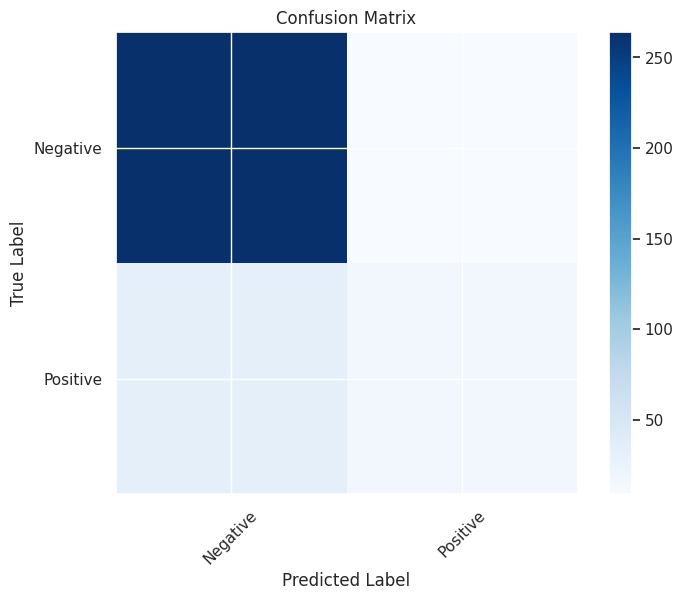

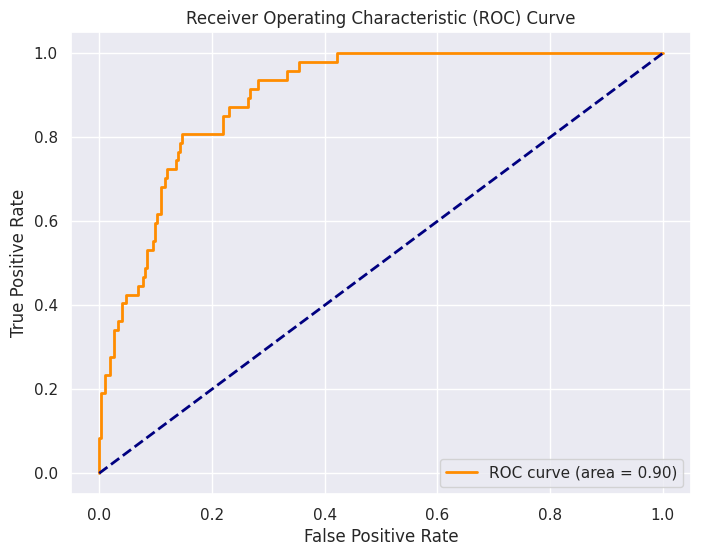

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Предсказания на тестовом наборе
y_pred_prob = model.predict(X_test)

# Преобразование вероятностей в бинарные предсказания
y_pred = np.round(y_pred_prob)

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC-кривая и площадь под кривой (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

# Визуализация ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


50/50 [==============================] - 0s 3ms/step


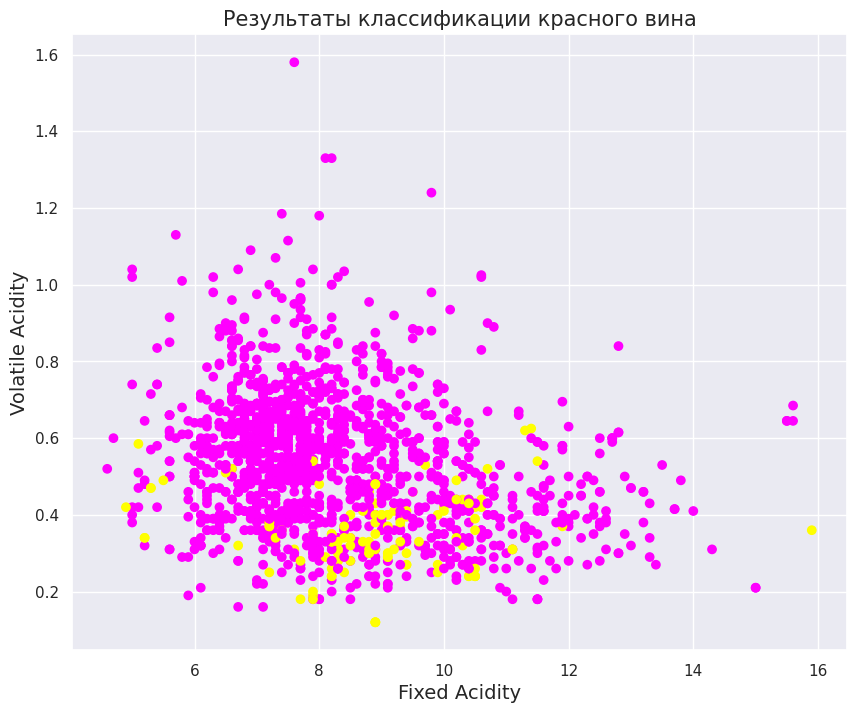

In [19]:
# Предсказания на всем наборе данных
proba_pred = model.predict(X_scaled)

# Преобразование вероятностей в бинарные предсказания
y_pred = np.round(proba_pred).reshape(-1)

# Визуализация результатов
plt.figure(figsize=(10, 8))
plt.scatter(data['fixed acidity'], data['volatile acidity'], c=y_pred, cmap='spring')
plt.title('Результаты классификации красного вина', fontsize=15)
plt.xlabel('Fixed Acidity', fontsize=14)
plt.ylabel('Volatile Acidity', fontsize=14)
plt.show()